In [153]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas

In [154]:
data_info = pandas.read_csv("NUSW-NB15_features.csv", encoding = "ISO-8859-1", header=None).values
features = data_info[:]
feature_names = features[:, 1]  # Names of the features in a list

 

In [155]:
dataframe1 = pandas.read_csv("UNSW.csv"       , names = feature_names, encoding = "ISO-8859-1", header=None)
dataframe2 = pandas.read_csv("UNSW-NB15_2.csv", names = feature_names, encoding = "ISO-8859-1",header=None)
dataframe3 = pandas.read_csv("UNSW-NB15_3.csv", names = feature_names,   encoding = "ISO-8859-1",header=None)
dataframe4 = pandas.read_csv("UNSW-NB15_4.csv",  names = feature_names,  encoding = "ISO-8859-1",header=None)

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [156]:
#concat datasets

dataframe = pandas.concat([dataframe1, dataframe2, dataframe3, dataframe4])

del dataframe1
del dataframe2
del dataframe3
del dataframe4

In [157]:

dataframe['attack_cat'] = dataframe['attack_cat'].replace(np.nan, 'Normal', regex=True)
dataframe.fillna(0, inplace=True)

In [158]:
dataframe[0:5]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,1,srcip,nominal,Source IP address,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,0.0
1,2,sport,integer,Source port number,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,0.0
2,3,dstip,nominal,Destination IP address,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,0.0
3,4,dsport,integer,Destination port number,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,0.0
4,5,proto,nominal,Transaction protocol,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,0.0


In [159]:
#TURN CATEGORICAL DATA INTO DUMMY VARIABLES 

x = dataframe.drop(['attack_cat','Label'], axis = 1)
y = dataframe[['attack_cat']]

dummies_1= pd.get_dummies(x['proto'])
dummies_2 = pd.get_dummies(x['state'])
dummies_3 = pd.get_dummies(x['srcip'])
dummies_4 = pd.get_dummies(x['dstip'])
dummies_5 = pd.get_dummies(x['service'])
dummies_6 = pd.get_dummies(x['ct_ftp_cmd'])


merged = pandas.concat([x, dummies_1], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged.drop(['zero'], axis = 1)
###


In [160]:
merged_1= pandas.concat([x, dummies_2], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column 

x = merged_1.drop(['no'], axis = 1)


In [161]:
merged_2 = pandas.concat([x, dummies_3], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged_2.drop(['59.166.0.9'], axis = 1)
###

In [162]:
merged_3 = pandas.concat([x, dummies_4], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged_3.drop(['59.166.0.9'], axis = 1)
##

In [163]:
###
merged_4 = pandas.concat([x, dummies_5], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged_4.drop(['ssl'], axis = 1)
##

In [164]:
###
merged_5 = pandas.concat([x, dummies_6], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged_5.drop(['4'], axis = 1)
##

In [165]:
#drop categorical features as they are now encoded

x = x.drop(['proto', 'state', 'srcip', 'dstip', 'service', 'ct_ftp_cmd', 'sport', 'dsport'], axis = 1)


x

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,snmp,ssh,0,1,2,4,,0,1,2
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,0.087306,320.0,1828.0,31.0,29.0,1.0,2.0,24465.671880,146610.765600,6.0,...,0,0,0,0,0,0,1,0,0,0
440040,0.365058,456.0,346.0,31.0,29.0,2.0,2.0,8743.816406,6333.240234,8.0,...,0,0,0,0,0,0,0,0,0,1
440041,6.335154,1802.0,2088.0,31.0,29.0,7.0,9.0,2204.839844,2549.582764,32.0,...,0,0,0,0,0,0,0,0,0,1
440042,2.200934,3498.0,166054.0,31.0,29.0,2.0,57.0,12496.513670,598375.062500,58.0,...,0,0,0,0,0,0,1,0,0,0


In [168]:
###scale data between 0 and 1 
## with 1 = standard deviation and mean = 0 

# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,-0.169486,-0.067843,-0.212275,-0.87527,-0.648869,-0.198764,-0.271981,-0.364229,-0.54641,-0.403695,...,-0.441501,-0.214582,-0.125473,-0.844855,-0.828684,-0.797923,-0.847422,-0.597068,-0.630162,-0.677665
1,-0.169486,-0.067843,-0.212275,-0.87527,-0.648869,-0.198764,-0.271981,-0.364229,-0.54641,-0.403695,...,-0.441501,-0.214582,-0.125473,-0.844855,-0.828684,-0.797923,-0.847422,-0.597068,-0.630162,-0.677665
2,-0.169486,-0.067843,-0.212275,-0.87527,-0.648869,-0.198764,-0.271981,-0.364229,-0.54641,-0.403695,...,-0.441501,-0.214582,-0.125473,-0.844855,-0.828684,-0.797923,-0.847422,-0.597068,-0.630162,-0.677665
3,-0.169486,-0.067843,-0.212275,-0.87527,-0.648869,-0.198764,-0.271981,-0.364229,-0.54641,-0.403695,...,-0.441501,-0.214582,-0.125473,-0.844855,-0.828684,-0.797923,-0.847422,-0.597068,-0.630162,-0.677665
4,-0.169486,-0.067843,-0.212275,-0.87527,-0.648869,-0.198764,-0.271981,-0.364229,-0.54641,-0.403695,...,-0.441501,-0.214582,-0.125473,-0.844855,-0.828684,-0.797923,-0.847422,-0.597068,-0.630162,-0.677665


In [170]:
y

,Target
0,False
1,False
2,False
3,False
4,False
...,...
440039,False
440040,False
440041,False
440042,False


In [172]:
#Turned Malicsious into True, Normal into false

y['Target'] = y['attack_cat'] != 'Normal'
y = y.drop('attack_cat', axis=1)

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [173]:
y[0:5]

,Target
0,False
1,False
2,False
3,False
4,False


In [175]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(y['Target'])

# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
y = dummies.values

print(y)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]


In [176]:
#Perform PCA to reduce dimensionality of feature vector for better accuracy
#reduce from 37 to 2 dimensional space

pca=PCA(n_components = 2)
pca.fit(x)
x_scaled = pca.transform(x)
print ("Original Shape:   ", x.shape)
print ("Transformed Shape:",x_scaled.shape)

x = x_scaled

print(x)

Original Shape:    (1840095, 39)
Transformed Shape: (1840095, 2)
[[ 5.14332339 -4.95581451]
 [ 5.14332339 -4.95581451]
 [ 5.14332339 -4.95581451]
 ...
 [ 1.74127504 -0.86111933]
 [ 3.70544641  2.31115405]
 [ 2.11833585 -1.8295924 ]]


In [177]:
#Split into test and training sets. 30% test sample 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [178]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288066, 2)
(552029, 2)
(1288066, 2)
(552029, 2)


In [179]:
from keras.layers import Dropout
from keras import initializers
from keras.optimizers import Adam

# Create Neural Network, with 4 hidden layers and 2 output layers being subjected to the softmax probability function
# and 2 input layers which was reduced by PCA

model = Sequential()

model.add(Dense(200, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1), bias_initializer = initializers.Constant(0.2)))
model.add(Dropout(0.3))
model.add(Dense(180, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.2), )) 
model.add(Dropout(0.3))
model.add(Dense(120, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.2), ))
model.add(Dropout(0.3))
model.add(Dense(60, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.1),bias_initializer = initializers.Constant(0.2), ))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1],activation='softmax')) #takes in an input and spits out 1D vector

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999)

#Add in hyper parameters
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer )
#Early stopping used to stop model from over or under fitting - stops when accuracy is no longer improving 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=3, mode='auto', restore_best_weights=False, baseline=None)
#Fit the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

Train on 1288066 samples, validate on 552029 samples
Epoch 1/100
1288066/1288066 [==============================] - 108s 83us/step - loss: 0.2838 - acc: 0.8608 - val_loss: 0.2210 - val_acc: 0.8985
Epoch 2/100
1288066/1288066 [==============================] - 91s 71us/step - loss: 0.1943 - acc: 0.9095 - val_loss: 0.1458 - val_acc: 0.9478
Epoch 3/100
1288066/1288066 [==============================] - 91s 71us/step - loss: 0.0956 - acc: 0.9668 - val_loss: 0.0728 - val_acc: 0.9733
Epoch 4/100
1288066/1288066 [==============================] - 89s 69us/step - loss: 0.0718 - acc: 0.9755 - val_loss: 0.0616 - val_acc: 0.9778
Epoch 5/100
1288066/1288066 [==============================] - 89s 69us/step - loss: 0.0645 - acc: 0.9777 - val_loss: 0.0574 - val_acc: 0.9791
Epoch 6/100
1288066/1288066 [==============================] - 90s 70us/step - loss: 0.0610 - acc: 0.9787 - val_loss: 0.0531 - val_acc: 0.9804
Epoch 7/100
1288066/1288066 [==============================] - 91s 71us/step - loss: 0.0

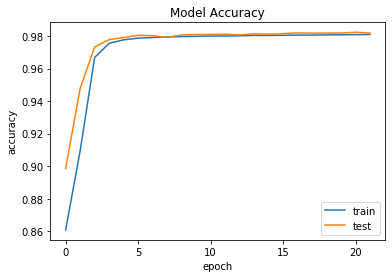

In [180]:
# plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

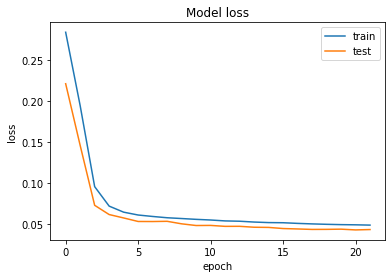

In [181]:
# plot training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [182]:
# Measure accuracy
predictors = model.predict(x_test)
predictors = np.argmax(predictors,axis=1)
prediction = np.argmax(y_test,axis=1)

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(prediction, predictors)

In [184]:
cm

array([[457442,   4632],
       [  5414,  84541]])

In [185]:
#True Positive (TP) : Observation is positive, and is predicted to be positive.
#False Negative (FN) : Observation is positive, but is predicted negative.
#True Negative (TN) : Observation is negative, and is predicted to be negative.
#False Positive (FP) : Observation is negative, but is predicted positive.

TP = 457442
FP = 4632
FN = 5414
TN = 84541

In [186]:

Acc = ((TP + TN)/(TP + TN + FP + FN))

print("Accuracy: ", Acc * 100, '%')

Accuracy:  98.18016807088034 %


In [187]:
# Recall 

Recall = ((TP)/(TP + FN))

print("Recall", Recall * 100, '%')

Recall 98.83030575384136 %


In [188]:
# Precision

Precision = ((TP)/(TP+FP))

print("Precision", Precision * 100, '%')

Precision 98.997563160879 %


In [189]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [190]:
#weights associated with each connect neuron 

weights

array([[-1.54320136e-01,  2.01782897e-01,  4.15616632e-01,
         3.10678095e-01, -2.92568654e-01, -1.61273569e-01,
         9.50400591e-01,  3.00522327e-01,  6.08241379e-01,
        -3.82471561e-01, -5.59686124e-01, -3.37820619e-01,
         1.12235332e+00,  1.02295905e-01,  2.38466695e-01,
         1.42810002e-01, -5.62925160e-01,  5.29421031e-01,
        -2.98374236e-01,  1.75802886e-01,  3.67981553e-01,
         2.28105259e+00,  2.66794890e-01, -2.48157352e-01,
         1.77817714e+00,  2.23937035e+00, -1.19097376e+00,
        -7.74154544e-01, -3.81358534e-01,  8.13683271e-01,
        -1.86267287e-01,  6.37453496e-01,  2.65006214e-01,
         1.36201763e+00,  2.23257065e+00,  2.49543715e+00,
         3.64574641e-01, -3.79045308e-01, -4.93729979e-01,
         4.26651001e-01, -3.28933656e-01,  1.91101718e+00,
        -1.95433423e-01, -4.97174412e-01,  2.03250915e-01,
         2.07481325e-01,  1.44305766e-01,  7.91119754e-01,
         1.58651447e+00, -4.94828448e-02, -1.91615894e-0

In [191]:
#bias for each connected neuron

biases

array([-0.5109274 ,  0.6931038 ,  1.2608777 ,  1.0625437 , -0.6793651 ,
       -0.506314  , -1.3448597 ,  1.0360434 , -0.11487111, -1.4578681 ,
       -1.4641678 , -0.55427176, -0.00576869, -0.3089198 ,  0.8250614 ,
       -0.39423937, -1.4613167 , -1.4724303 ,  0.92763954,  0.623357  ,
        1.0520333 , -1.0378592 , -1.0328292 , -0.31617287, -0.8201583 ,
       -0.85348713,  0.02722547, -0.04466898, -1.1270106 , -2.1185021 ,
       -0.45233846, -1.5278735 ,  0.93908036, -0.59273845, -1.0726696 ,
       -0.05829147,  1.2508335 , -0.7365518 , -1.6634485 , -1.065174  ,
       -1.1639675 , -1.1531657 , -0.6681579 , -0.5460073 ,  0.5096631 ,
       -0.80147094,  0.19490464, -1.447568  , -0.31885424,  0.19444251,
        0.28581753, -0.7404237 ,  0.79773617,  0.66887945,  0.88106   ,
        0.361494  , -1.1924528 ,  0.37942997, -0.15757377, -0.01714936,
       -0.750086  , -0.55310744, -0.08784981, -1.0693737 ,  0.09876902,
       -1.1078482 , -0.27532506,  0.72751355, -0.9690496 , -0.26

In [192]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [193]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [194]:
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [195]:
loaded_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer )
score = loaded_model.evaluate(x_test,y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 98.18%
